In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense
import numpy as np

(10000, 28, 28)


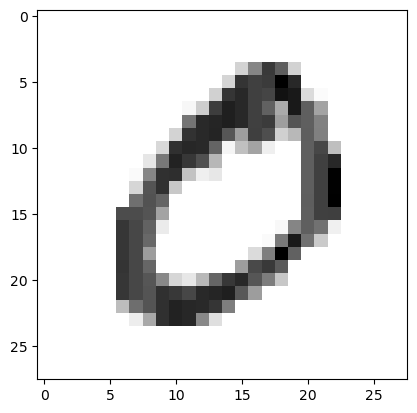

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8671 - loss: 0.4748
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1144
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0744
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0535
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0381


In [75]:
# Loading the data  -> Already loaded data 

mnist = tf.keras.datasets.mnist 
(x_train,y_train) , (x_test,y_test) = mnist.load_data() # loads a 28 x 28 images of handwritten digits 0-9 

print(x_test.shape)
# Normalizing the data 

# print(x_train[0])
# print(x_train[0].shape)
x_train =  tf.keras.utils.normalize(x_train , axis = 1)
x_test =  tf.keras.utils.normalize(x_test , axis = 1)
# print(x_train[0])


# x_train.ndim
# Plotting the input data -> in bw format
plt.imshow(x_train[1],cmap = plt.cm.binary) # cmap = colour mapping 
plt.show()


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten()) # transforms 28 x 28 array into a one-dimensional array -> do it before adding the dense layer 

model.add(Dense(128 , activation = "relu"))
model.add(Dense(128 , activation = "relu"))

# we need prob -> so use softmax  -> we use linear to get better accuracy and change to softmax later 
model.add(Dense(10 , activation = "linear")) # output layer -> units = no of classification 



model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
)


model.fit(x_train, y_train,epochs= 5)



In [63]:

z_values = model.predict(x_train)
print(z_values)
print(z_values.shape)
# op is z here and not prob because we are using linear and not softmax -> so pass through softmax 


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step
[[-14.251715    -0.02545547  -2.9760213  ...  -6.4204593   -9.837824
   -3.3983088 ]
 [ 12.631105    -1.637262    -1.1689365  ...  -6.8129497   -6.6213694
   -1.2831372 ]
 [-14.07561      0.1634269    0.72461766 ...  -0.5319532   -6.3677635
   -7.048053  ]
 ...
 [-12.470342    -7.6866646   -9.51876    ... -11.822789     0.46398073
   -3.0481954 ]
 [ -1.0042549   -2.6627665   -4.9252214  ...  -6.140846    -1.9163532
   -8.168448  ]
 [ -4.2921824   -7.6824956   -5.38745    ...  -5.6370063    9.921378
   -2.886816  ]]
(60000, 10)


In [69]:
# Converting into probability
prob_values = tf.nn.softmax(z_values).numpy() # to just get rid of tf.Tensor while printing 

print(prob_values.shape)
print(prob_values[0])


(60000, 10)
[3.5576482e-14 5.3647423e-08 2.8063039e-09 1.3029249e-03 4.1261767e-16
 9.9869710e-01 5.4449671e-15 8.9584701e-11 2.9382681e-12 1.8396608e-09]


In [94]:
# Evaluating the model 

val_loss , val_acc = model.evaluate(x_test,y_test)
print(f"Accuracy is {val_acc*100}%")
print(f"Loss is {val_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9678 - loss: 0.1065
Accuracy is 97.28999733924866%
Loss is 0.089718759059906


In [95]:
# For the test data

y_predicted = np.zeros(10000, dtype=np.int64)

p_test = model.predict(x_test)
prob_test = tf.nn.softmax(p_test).numpy() #  since we used a linear in the output layer 

# print(prob_test)
# print(prob_test.shape)

for i in range(10000) :
    # print(np.argmax(prob_test[i]))
    y_predicted[i] = np.argmax(prob_test[i])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


In [96]:
# Comparing y_train and y_predicted 

# Same as model - evaluate 
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    if (y_predicted[i] == y_test[i]):
        correct_predictions += 1

accuracy = correct_predictions / total_predictions * 100

print("Accuracy:", accuracy, "%")



Accuracy: 97.28999999999999 %


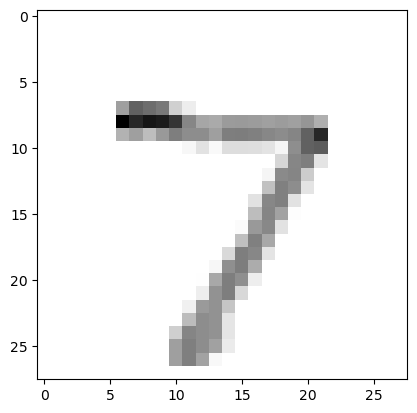

Prediction made is 7


In [97]:
# Printing the first x_test 

plt.imshow(x_test[0],cmap = plt.cm.binary)
plt.show()

print(f"Prediction made is {y_predicted[0]}")